In [8]:
import macd_core
import pandas as pd
import yfinance as yf
import numpy as np

In [12]:
SIGNAL_WINDOW = 9
SHORT_WINDOW = 12
LONG_WINDOW = 26

df = yf.Ticker('AAPL').history(period='1d', interval='5m')
df 

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-06 09:30:00-05:00,126.010002,127.014999,125.470001,126.949997,5112468,0,0
2023-01-06 09:35:00-05:00,126.931503,127.190002,125.430000,125.716904,2157688,0,0
2023-01-06 09:40:00-05:00,125.707802,125.839996,124.889999,124.970001,1873950,0,0
2023-01-06 09:45:00-05:00,124.959999,125.589996,124.919998,125.426300,1338414,0,0
2023-01-06 09:50:00-05:00,125.430000,126.379997,125.360001,126.280098,1555106,0,0
...,...,...,...,...,...,...,...
2023-01-06 15:40:00-05:00,129.850006,130.000000,129.800003,129.800598,983464,0,0
2023-01-06 15:45:00-05:00,129.800003,129.970001,129.759995,129.769897,965565,0,0
2023-01-06 15:50:00-05:00,129.759995,129.809998,129.479996,129.589996,2281429,0,0


In [10]:
pd.set_option('display.max_columns', None)
df 

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-06 09:30:00-05:00,126.010002,127.014999,125.470001,126.949997,5112468,0,0
2023-01-06 09:35:00-05:00,126.931503,127.190002,125.430000,125.716904,2157688,0,0
2023-01-06 09:40:00-05:00,125.707802,125.839996,124.889999,124.970001,1873950,0,0
2023-01-06 09:45:00-05:00,124.959999,125.589996,124.919998,125.426300,1338414,0,0
2023-01-06 09:50:00-05:00,125.430000,126.379997,125.360001,126.280098,1555106,0,0
...,...,...,...,...,...,...,...
2023-01-06 15:40:00-05:00,129.850006,130.000000,129.800003,129.800598,983464,0,0
2023-01-06 15:45:00-05:00,129.800003,129.970001,129.759995,129.769897,965565,0,0
2023-01-06 15:50:00-05:00,129.759995,129.809998,129.479996,129.589996,2281429,0,0


In [17]:
df = df.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'])
df 

,Close,Volume
Datetime,,
2023-01-06 09:30:00-05:00,126.949997,5112468
2023-01-06 09:35:00-05:00,125.716904,2157688
2023-01-06 09:40:00-05:00,124.970001,1873950
2023-01-06 09:45:00-05:00,125.426300,1338414
2023-01-06 09:50:00-05:00,126.280098,1555106
...,...,...
2023-01-06 15:40:00-05:00,129.800598,983464
2023-01-06 15:45:00-05:00,129.769897,965565
2023-01-06 15:50:00-05:00,129.589996,2281429


In [14]:
macd_core.ema(df, 'Close', SHORT_WINDOW, 'slowma')
macd_core.ema(df, 'Close', LONG_WINDOW, 'fastma')
df = df[df['slowma'].notna()]
df = df[df['fastma'].notna()]
macd_core.macd(df)
macd_core.buy_sell_signal(df)
df.head(15)
    

,Open,High,Low,Close,Volume,Dividends,Stock Splits,slowma,fastma,MACD,signal,histogram,upward,sell_signal,downward,buy_signal
Datetime,,,,,,,,,,,,,,,,
2023-01-06 09:30:00-05:00,126.010002,127.014999,125.470001,126.949997,5112468,0,0,126.949997,126.949997,0.000000,0.000000,0.000000,0.0,NaN,0.0,NaN
2023-01-06 09:35:00-05:00,126.931503,127.190002,125.430000,125.716904,2157688,0,0,126.282071,126.309737,-0.027666,-0.015370,-0.012296,0.0,0.0,1.0,1.0
2023-01-06 09:40:00-05:00,125.707802,125.839996,124.889999,124.970001,1873950,0,0,125.769970,125.828383,-0.058413,-0.033010,-0.025402,0.0,0.0,1.0,0.0
2023-01-06 09:45:00-05:00,124.959999,125.589996,124.919998,125.426300,1338414,0,0,125.661487,125.715978,-0.054491,-0.040287,-0.014204,0.0,0.0,1.0,0.0
2023-01-06 09:50:00-05:00,125.430000,126.379997,125.360001,126.280098,1555106,0,0,125.829561,125.846800,-0.017239,-0.033431,0.016192,1.0,1.0,0.0,-1.0
2023-01-06 09:55:00-05:00,126.279999,126.690002,125.800003,125.800003,1419075,0,0,125.822377,125.837427,-0.015050,-0.028448,0.013399,1.0,0.0,0.0,0.0
2023-01-06 10:00:00-05:00,125.800003,127.000000,125.800003,126.059998,2163543,0,0,125.875401,125.877010,-0.001609,-0.021656,0.020047,1.0,0.0,0.0,0.0
2023-01-06 10:05:00-05:00,126.059998,127.250000,125.980003,126.970001,1512444,0,0,126.103827,126.053118,0.050710,-0.004265,0.054975,1.0,0.0,0.0,0.0
2023-01-06 10:10:00-05:00,126.985001,127.099998,126.639999,126.785004,1314518,0,0,126.238588,126.161599,0.076989,0.014505,0.062484,1.0,0.0,0.0,0.0


In [22]:
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
xformatter = mdates.DateFormatter('%H:%M')



plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] =(20,10)

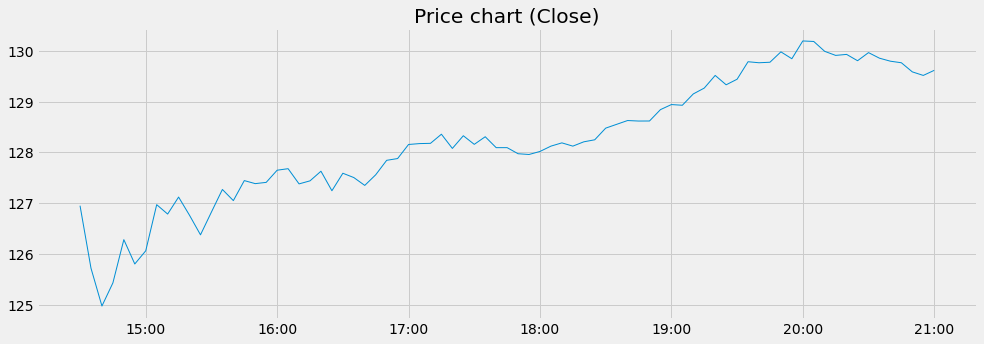

In [25]:
# plot close price
plt.figure(figsize=(15,5))
plt.plot(df.index, df['Close'], label="close", linewidth=1)
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.title('Price chart (Close)')
plt.show()

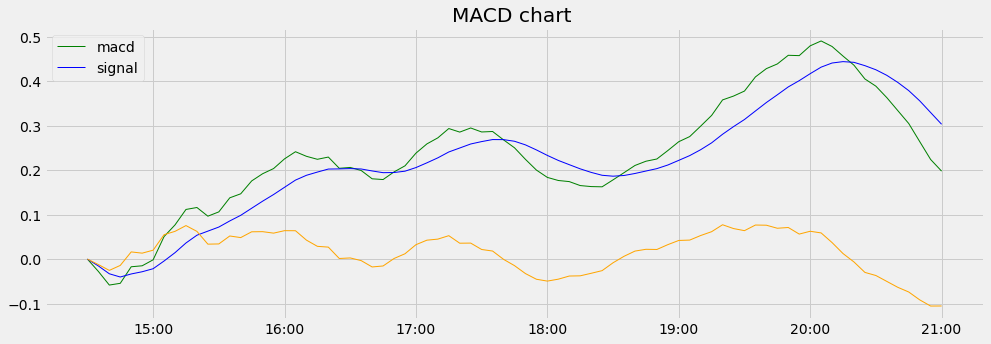

In [28]:
plt.figure(figsize=(15,5))
plt.title('MACD chart ')
plt.plot(df.index, df['MACD'],label="macd", color='green', linewidth=1)
plt.plot(df.index, df['signal'], label="signal", color='blue', linewidth=1)
plt.plot(df.index, df['histogram'], color='orange', linewidth=1)
# plt.bar(df.index, df['histogram'], width=2, snap=False, color='skyblue')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.legend()
plt.show()

In [29]:
df['histogram']

Datetime
2023-01-06 09:30:00-05:00    0.000000
2023-01-06 09:35:00-05:00   -0.012296
2023-01-06 09:40:00-05:00   -0.025402
2023-01-06 09:45:00-05:00   -0.014204
2023-01-06 09:50:00-05:00    0.016192
                               ...   
2023-01-06 15:40:00-05:00   -0.063484
2023-01-06 15:45:00-05:00   -0.074049
2023-01-06 15:50:00-05:00   -0.091699
2023-01-06 15:55:00-05:00   -0.105660
2023-01-06 16:00:00-05:00   -0.105512
Name: histogram, Length: 79, dtype: float64

In [ ]:
}